# Deep Learning with TensorFlow Module 2

[Based on this CognitiveClass Course](https://cognitiveclass.ai/courses/deep-learning-tensorflow/)

## Deep Learning

Deep learning is a series of

- Supervised
- Unsupervised
- Semi-Supervised

Deep Neural Networks are NNs with more than 2 layers and use sophisticated mathematical modeling to extract feature sets automatically

Some DNN models are the following

- CNNs help us to do tasks such as image classification, object detection, and image recolouring by automatically finding best features in complex data and classifying them based on this
- RNNs helps with predictive modeling of sequence-based data, tasks like sentiment analysis, word prediction, translation and speech to text
- RBMs are used to find patterns in data in an unsupervised manner, based on this they are able to extract important features on their own. RBM's are significant for the building of other networks such as DBNs
- DBNs were designed in order to solve the vanishing gradient and back-prop problem and solves this by the use of a stack of RBMs and are typically used for classification problems. DBNs are very accurate and can work with smaller sets of data
- Autoencoders extract the most valuable features and use these extract additional data

## Convolutional Neural Nets

### Introduction

CNNs are useful for a lot of different tasks such as

- Signal and image processing
- Handwriting recognition
- Natural object classification
- Segmentation
- Face detection
- Recommender systems
- Speech recognition
- Natural language understanding

CNNs are designed to create good representations of the visual world and needs to be able to

- Detect and classify objects
- Be independant of scale, pose, etc.

A CNN is a hierarchial way of understanding images which consist of many primitive features, objectt parts, and objects

### CNNs for Classification

CNNs identify features and by making use of many layers will eventually be able to identify a specific object

### CNN Architecture

A CNN contains a few different layers. The first is a Convolution Layer. This defines a filter/kernel and applies a dot product to the pixels beneath the filter, this will output a specific type of feature - for example a edges

For example, with a black/white image we can represent the pixels as follows

$$
P=\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 0 
\end{bmatrix}
$$

And a filter/kernel defined with:

$$
F=\begin{bmatrix}
0 & 0 & 0 \\
0 & -1 & 1 \\
0 & 0 & 0 
\end{bmatrix}
$$

Note that the filter/kernel defined above is an Edge Detection kernal

The filter is then slid over the image, and at location we take the dot product $F\cdot P$ with multiple different Filters and output a convolved matrix

The convolution operation can be defined mathematically as follows

$$
y(n) = \sum\limits_{k\to-\infty}^\infty x(k) \cdot h(n-k)
$$

We make use of ReLU as the activation function on top of nodes in the activation function in order to amplify the non-linear properties for the decision

We then use pooling to reduce the number of features

Next a fully connected layer is used to convert the layers into a 1D vector which then enables us to do a classification

Lastly a SoftMax layer can be used to identify the probability of each given classification

Our layers will be as follows

```
1. Image -> 
       2. Kernel -> 
               3. Convolved Layers -> 
                                 4. ReLU -> 
                                       5. Pooling -> 
                                                6. Fully Connected -> 
                                                                 7. Softmax
```

A complex CNN will make use of multiple of the above steps 2 to 5

During the training process the network learns the connections between the layers by modifying the Weights and Biases between the layers

### Lab - Understanding Convolution

Taking a look at the Lab notes can be helpful to understand this as there are some helpful images and diagrams that explain the convolution process pretty well

#### 1D Convolution

Say we have a 1D convolution operation, we can do this as follows:

With `x` as the kernel and `h` as the image

Note that during the convolution process we essentially have a dot-product with a kernal that is flipped, as can be seen from the results below. Further it can be noted that `numpy` automatically pads the image matrix with a default `mode` of `'full'` (note that `mode` is the third input of the function)

In [1]:
import numpy as np

In [2]:
h = [2, 1, 0]
x = [3, 4, 5]

y = np.convolve(x, h)
print(y)

[ 6 11 14  5  0]


In [3]:
print(np.convolve(x, h,'full'))
print(np.convolve(x, h, 'same'))
print(np.convolve(x, h, 'valid'))

[ 6 11 14  5  0]
[11 14  5]
[14]


In [4]:
h = [1, 2, 5, 4]
x = [6, 2]

y = np.convolve(x, h, 'valid')
print(y)

[14 34 34]


Looking at the above operation we can see the process in which the convolution is applied with the following (note the flipped kernel)

```
[2, 6] o [1, 2] = 2 x 1 + 6 x 2 = 2 + 12  = 14
[2, 6] o [2, 5] = 2 x 2 + 6 x 5 = 4 + 30  = 34
[2, 6] o [5, 4] = 2 x 5 + 6 x 4 = 10 + 24 = 34

y = [14, 34, 34]
```

#### 2D Convolution

2D convolution is defined by the following equation

$$ 
y(u,v)= \sum\limits_{u,v} x(u,v)\cdot h(x-u,y-v) 
$$

For higher dimensional convolution we need to use Scipy's `signal` module

In [5]:
from scipy import signal as sg

In [6]:
h = [[255,   7,   3],
     [212, 240,   4],
     [218, 216, 230]]

x = [[-1, 1]]

y = sg.convolve(x, h, 'valid')
print(y)

[[248   4]
 [-28 236]
 [  2 -14]]


In [7]:
print('full:\n', sg.convolve(x, h,'full'), '\n')
print('same:\n', sg.convolve(x, h, 'same'), '\n')
print('valid:\n', sg.convolve(x, h, 'valid'))

full:
 [[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]] 

same:
 [[-28 236]] 

valid:
 [[248   4]
 [-28 236]
 [  2 -14]]


In [8]:
h = [[255,   7,   3],
     [212, 240,   4],
     [218, 216, 230]]

x = [[-1, 1],
     [2, 3]]

y = sg.convolve(x, h, 'valid')
print(y)

[[ 751  263]
 [1118  714]]


In [9]:
print('full:\n', sg.convolve(x, h,'full'), '\n')
print('same:\n', sg.convolve(x, h, 'same'), '\n')
print('valid:\n', sg.convolve(x, h, 'valid'))

full:
 [[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

same:
 [[ 751  263]
 [1118  714]] 

valid:
 [[ 751  263]
 [1118  714]]


#### With TensorFlow

Given two tensors:

- 10x10 image, 1 Channel ,4D tensor: [batch size, width, height, nummber of channels]
- 3x3 filter, 1 Channel ,4D tensor: [width, height, channels, number of filters]

The output with the Valid mode will be

$$
outputsize=inputsize-kerneldimension+1
$$

We can create two random tensors in TF as folows

#### Import TF

In [10]:
import tensorflow as tf

#### Build the Graph

In [11]:
input_var = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter_var = tf.Variable(tf.random_normal([3, 3, 1, 1]))

In [12]:
conv_valid_op = tf.nn.conv2d(input_var, filter_var, 
                             strides=[1, 1, 1, 1], 
                             padding='VALID')

conv_same_op = tf.nn.conv2d(input_var, filter_var, 
                             strides=[1, 1, 1, 1], 
                             padding='SAME')

#### Define Initialization Operation

In [13]:
init_op = tf.global_variables_initializer()

#### Run the Session

In [14]:
with tf.Session() as sess:
    sess.run(init_op)
    result_valid, result_same = sess.run([conv_valid_op, conv_same_op])
    print('input_var:\n', input_var.eval())
    print('\nfilter_var:\n', filter_var.eval())
    print('\nresult_valid:\n', result_valid)
    print('\nresult_same:\n', result_same)

input_var:
 [[[[  3.38305980e-01]
   [  9.19176698e-01]
   [ -1.42268646e+00]
   [ -1.67752612e+00]
   [ -1.04113710e+00]
   [ -5.91926686e-02]
   [ -2.20696718e-01]
   [ -8.50803554e-01]
   [  4.21003327e-02]
   [  9.94214475e-01]]

  [[ -2.64589995e-01]
   [  4.45409924e-01]
   [  9.33443904e-02]
   [  8.02106142e-01]
   [  1.11680996e+00]
   [ -5.04706316e-02]
   [  3.38564187e-01]
   [  3.59403431e-01]
   [  2.00716168e-01]
   [ -9.46862936e-01]]

  [[ -9.87474561e-01]
   [  9.03029561e-01]
   [  8.01724076e-01]
   [  6.06933415e-01]
   [ -1.13083243e+00]
   [ -3.04037958e-01]
   [  5.97666919e-01]
   [ -1.12860307e-01]
   [ -3.76372337e-01]
   [  1.78885818e+00]]

  [[ -2.52159201e-02]
   [  3.18049133e-01]
   [  9.69143391e-01]
   [  1.77197039e+00]
   [  3.07469100e-01]
   [ -2.29080483e-01]
   [  1.80142796e+00]
   [  2.95765996e-01]
   [ -1.73849750e+00]
   [ -1.04120672e+00]]

  [[  6.05759323e-01]
   [  5.12954116e-01]
   [ -4.50151712e-01]
   [  1.94018036e-01]
   [  2.1946

#### Convolution with Images

First, we need to download the image wih the following

In [15]:
!wget https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg    

--2019-02-08 08:02:34--  https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg [following]
--2019-02-08 08:02:35--  https://ibm.ent.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 185.235.236.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|185.235.236.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!VVLUkc9eEZ02UhxscjrVdu6CIVUc27x0203iXYt6Pb9LH_S_7pvXQggvKWQP_sG9yhuc69Y5PGGsjPn5TNvaJloqbwT6X8n7bPNpM_z53aYZJuxN-dMkYxp9XQum67v4BkpJc1tdsfVcWI4UlI5j0uunr2phlNIn1LASizVPcsjbwWGJde_KEoLfw0zyPTONeXJwKW-bQcDA7wi2aRpElbj8QhPJwWq1Y29MU66LLG1kyTmg43UibGM1x_XD9R32nH9NvYwf5VGx54kVB5

We can see that the image is now in the workspace as `bird.jpg`

In [16]:
!ls -a

.  ..  bird.jpg  MNIST_data


#### Import Libraries for Image Processing

In [17]:
import numpy as np
from scipy import signal as sg
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

#### Import Image and Make BW

We can read in the image and convert it with the `L` method which will use the ITU-R 601-2 Luma Transform to convert the image to grayscale

In [18]:
with Image.open('bird.jpg') as image:
    image_bw = image.convert('L')

print('image_bw\n', image_bw)

image_bw
 <PIL.Image.Image image mode=L size=1920x1440 at 0x7F4A20057DA0>


#### Convert Image to Array

In [19]:
image_array = np.asarray(image_bw)
print('image_array\n', image_array)

image_array
 [[ 64  71  64 ...,  49  47  48]
 [ 68  71  63 ...,  53  52  51]
 [ 65  69  65 ...,  54  50  55]
 ..., 
 [ 21  23  22 ..., 184 170 154]
 [ 17  20  26 ..., 179 165 152]
 [ 26  22  21 ..., 170 159 148]]


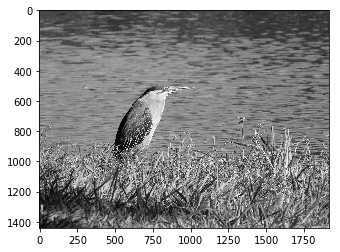

In [20]:
image_plot = plt.imshow(image_array)
image_plot.set_cmap('gray')
plt.show(image_plot)

#### Apply an Edge Detector Kernal to the Image

In [21]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

gradient_map = sg.convolve2d(image_array, kernel, mode='same', boundary='symm')
print(gradient_map)

[[ 11 -14   7 ...,  -4   8   2]
 [ -4 -13  12 ..., -14  -7   2]
 [ 10  -5   5 ...,  -7  12  -9]
 ..., 
 [  3  -1   8 ..., -10  -4  19]
 [ 16   8 -15 ...,  -8   0  11]
 [-13   1   5 ...,   8   6  15]]


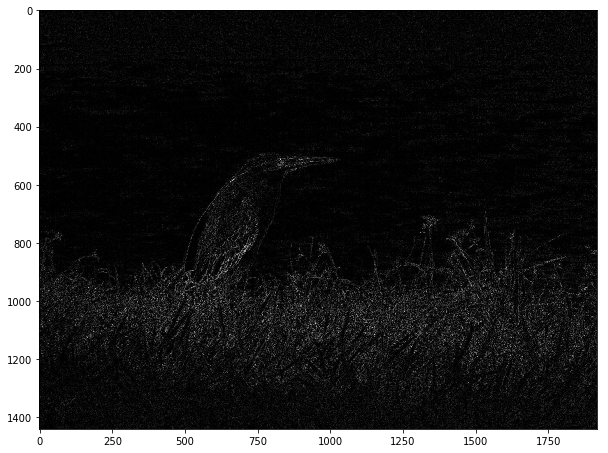

In [22]:
fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(gradient_map), cmap='gray')
plt.show(aux)

The act of chainging and optimizing these kernals is the work of a CNN

Note that typically when we are dealing with CNNs we usually normalize our pixels to be in the [0,1] range

In [23]:
gradient_biases = np.absolute(gradient_map) + 100
gradient_biases[gradient_biases > 255] = 255
print(gradient_biases)

[[111 114 107 ..., 104 108 102]
 [104 113 112 ..., 114 107 102]
 [110 105 105 ..., 107 112 109]
 ..., 
 [103 101 108 ..., 110 104 119]
 [116 108 115 ..., 108 100 111]
 [113 101 105 ..., 108 106 115]]


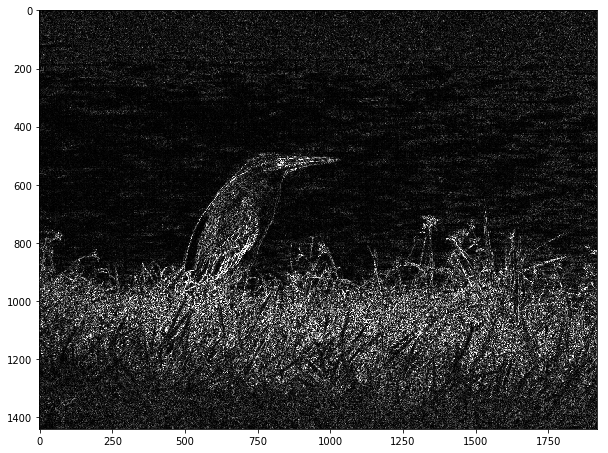

In [24]:
fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(gradient_biases), cmap='gray')
plt.show(aux)

#### Edges on a Digit

We can do the same thing for a digit-image

In [25]:
# download standard image
!wget https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    

--2019-02-08 08:02:40--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2019-02-08 08:02:41--  https://ibm.ent.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 185.235.236.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|185.235.236.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!6LZWceqjL23hIC1KgNI0FMH0fNsqgi84sgJQ66PkLbZcoFICe0SeZDjSjBucJz-hIMKiCBHxaov-I2LWOUczUplTj8QBmz_lLSxaqg-XkV44kNkulj03US_zzbO_jh8jivrJf--LnDkpAKVhltSHaWjhFYk84fWhF8eSjy52oqiAIfXO63Y31nNF30Y23JJX3u0GLcOeMkbOv8Hf36xeG_uB_eaRwUeQeVQ-OKUBQQqM_p5v4z3XFutb5Qd_t8JWYzpjI0sRq9GiaXodFATT

In [26]:
with Image.open('num3.jpg') as image:
    image_bw = image.convert('L')
    
print('image_bw\n', image_bw)

image_bw
 <PIL.Image.Image image mode=L size=181x181 at 0x7F4A20057E48>


In [27]:
image_array = np.asarray(image_bw)
print('image_array\n', image_array)

image_array
 [[26 14 12 ..., 11 11 11]
 [ 0  0  1 ...,  0  0  0]
 [12  1  0 ...,  0  0  0]
 ..., 
 [12  0  0 ...,  0  0  0]
 [12  0  0 ...,  0  0  0]
 [12  0  0 ...,  0  0  0]]


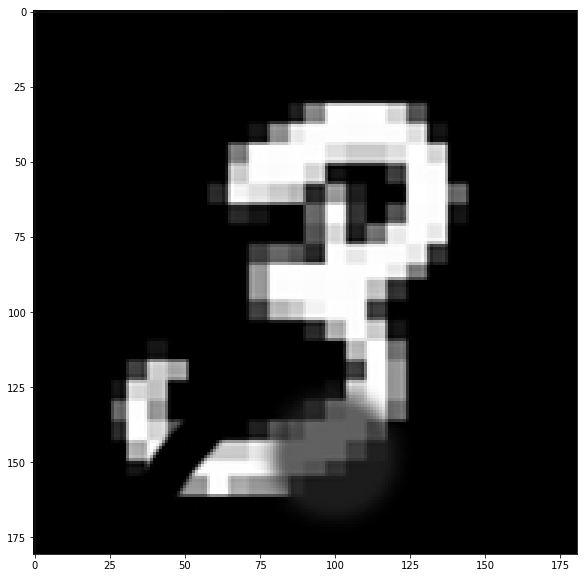

In [28]:
fig, aux = plt.subplots(figsize=(10,10))
image_plot = plt.imshow(image_array)
image_plot.set_cmap('gray')
plt.show(image_plot)

#### Edge Detection

Next we can apply the Edge Detection kernal to the image:

In [29]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

gradient_map = sg.convolve2d(image_array, kernel, mode='same', boundary='symm')
print('gradient_map\n',gradient_map)

gradient_map
 [[-38  -4  -8 ..., -11 -11 -11]
 [ 38  16   8 ...,  11  11  11]
 [-22   8   2 ...,   0   0   0]
 ..., 
 [-12  12   0 ...,   0   0   0]
 [-12  12   0 ...,   0   0   0]
 [-12  12   0 ...,   0   0   0]]


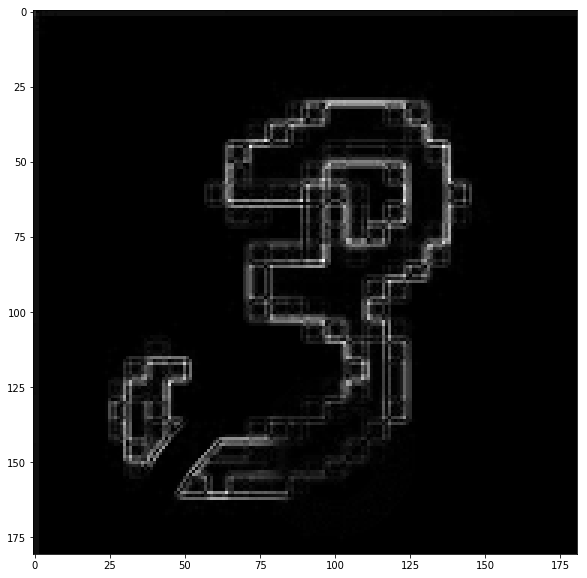

In [30]:
fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(gradient_map), cmap='gray')
plt.show(aux)

### Lab - MNIST DataSet

The MNIST dataset is a collection of 70 000 handwritten digits, 60 000 for training and 10 000 for testing

These are also noramlized and optimised

#### Import MNIST

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [32]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The `one_hot` option means that the labels will be presented as integers as opposed to binary

The dataset contains the following

1. `mnist.training`
    - For training the network
    - 55000 points
    - `mnist.train.images` for inputs
    - `mnist.train.labels` for outputs
2. `mnist.validation`
    - To generate model properties and tune parameters
    - 5000 points
    - `mnist.validation.images` for inputs
    - `mnist.validation.labels` for outputs
3. `mnist.test`
    - For testing the performance of the model
    - 10000 points
    - `mnist.test.images` for inputs
    - `mnist.test.labels` for outputs
    
#### Creating the Session

Tensorflow has two session options

1. `tf.Session()` which will execute the operations we have already defined
2. `tf.InteractiveSession()` which will allow us to code as we go along

In [33]:
sess = tf.InteractiveSession()

#### Create PLaceholders

In TF it is typically best to create placeholders before variable assignments

Data input 

- 784 pixels (28x28)
- Batch size of `None`

Data output

- 10 classes
- Batch size of `None`

In [34]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

#### Weights and Biases

In [35]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

#### Initialize the Variables

In [36]:
# run the op initialize_all_variables using an interactive session
sess.run(tf.global_variables_initializer())

#### Add Weights and Biases

#### Softmax Regression

Softmax is an actvation function that generates a probabalistic classification

In [37]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

#### Cost Function

In [38]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

#### Training Optimizer

In [39]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#### Batch Training

We train the model in batches as to reduce the computational load by breaking the dataset into smaller batches

In [40]:
#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

#### Test

In [41]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [42]:
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 91.71000123023987 % 


In [43]:
sess.close()

#### Using a Regular Session

In [44]:
x_ph = tf.placeholder(tf.float32, shape=[None, 784])
y_ph = tf.placeholder(tf.float32, shape=[None, 10])

weights_var = tf.Variable(tf.zeros([784, 10], tf.float32))
biases_var = tf.Variable(tf.zeros([10], tf.float32))

init_op = tf.global_variables_initializer()

y = tf.nn.softmax(tf.matmul(x_ph, weights_var) + biases_var)

cost_op = tf.reduce_mean(-tf.reduce_sum(y_ph * tf.log(y), reduction_indices=[1]))

train_op = tf.train.GradientDescentOptimizer(0.5).minimize(cost_op)

#### Run Batches

In [45]:
from IPython.display import display, clear_output

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        clear_output(wait=True)
        display('iteration: ' + str(i+1))
        batch = mnist.train.next_batch(50)
        sess.run(train_op, feed_dict={x_ph: batch[0], y_ph:batch[1]})
        
    correct_prediction_op = tf.equal(tf.argmax(y, 1), tf.argmax(y_ph, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction_op, tf.float32))
    accuracy = accuracy_op.eval(feed_dict={x_ph: mnist.test.images, 
                                           y_ph: mnist.test.labels})
print('batch training accuracy', accuracy)

'iteration: 1000'

batch training accuracy 0.898


#### All at Once - Single Pass

In [46]:
with tf.Session() as sess:
    sess.run(init_op)
    sess.run(train_op, feed_dict={x_ph: mnist.train.images, 
                                  y_ph: mnist.train.labels})
        
    correct_prediction_op = tf.equal(tf.argmax(y, 1), tf.argmax(y_ph, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction_op, tf.float32))
    accuracy = accuracy_op.eval(feed_dict={x_ph: mnist.test.images, 
                                           y_ph: mnist.test.labels})
print('all-at-once accuracy', accuracy)

all-at-once accuracy 0.6705


#### All at Once  - Multi Pass

The next cell can take a while, change the cell type to `Code` to run it

### Lab - Deep Learning with MNIST

The previous model will be improved by making use of a Deep Neural Network with the following architecture

| Layer No. | Layer     | Dimensions               |
| --------- | --------- | -----------------------  |
| 0.        | Input     | [batch_size, 28, 28, 1] >> Apply 32 [5,5,1] filters |
| 1.        | CL 1      | [batch_size, 28, 28, 32] |
| 2.        | ReLU 1    | [?, 28, 28, 32]          |
| 3.        | Pooling 1 | [?, 14, 14, 32]          |
| 4.        | CL 2      | [?, 14, 14, 64]          |
| 5.        | ReLU 2    | [?, 14, 14, 64]          |
| 6.        | Pooling 2 | [?, 7, 7, 64]            |
| 7.        | FC 1      | [1x1024]                 |
| 8.        | ReLU FC    | [1x1024]                 |
| 9.        | Drop out  | [1x1024]                 |
| 10.       | FC 2      | [1x10]                   |

The code for this part is directly from the Lab Doc

#### Starting Up

Firstly, we will close any existing sessions and start a new Interactive Session

In [47]:
import tensorflow as tf

In [48]:
sess = tf.InteractiveSession()

#### Get the Data

We'll make use of the same MNIST dataset as before

In [49]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Initial parameters

We'll create some variables to store a few of the basic parameters for the model

In [50]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

#### Input and Output Placeholders

Next we need to create placeholders for the input and output data, these will be `float32` and have their shapes as seen below

In [51]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

#### Convert Image to Tensor

The images need to be put into tensors so we can use them, this can be done using `tf.reshape()`. The input image is 28px by 28px by 1 channel, therefore `28,28,1`, the batch number is set to `-1`, the reason for this can be seen in the function documentation as follows

> If one component of `shape` is the special value -1, the size of that dimension is computed so that the total size remains constant.  In particular, a `shape` of `[-1]` flattens into 1-D.  At most one component of `shape` can be -1.



In [52]:
x_image = tf.reshape(x, [-1,28,28,1])  
print(x_image)

Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)


#### Convolutional Layer 1

We define the Kernel here, the size of the filter kernel is `5x5` and has a single input channel (grayscale). Since we are applying `32` filters the output of CL1 will be `28x28x32`. The shape of our kernel will hence need to be

```
[filter height, filter width, input channels, output channels]
```

Given that

```
filter height   = 5
filter width    = 5
input channels  = 1
output channels = 32
```

We also know that the filter is defined by the equation $F=Wx+b$, therefore we need define our weights which will be of shape `5x5x1x32` and biases which will be of the shape `32` and will be a constant value of `0.1`

In [53]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

Next we need to do a two dimensional convolution operation which would be the application of our first layer, this can be done with `tf.nn.conv2d()`

In [54]:
convolve1= tf.nn.conv2d(x_image, 
                        W_conv1, 
                        strides=[1, 1, 1, 1], 
                        padding='SAME') + b_conv1

#### ReLU 1

The ReLU activation function is defined by the following:

$$
f(x) = 0; x \in (-\infty, 0)
$$


$$
f(x) = x; x \in [0,\infty)
$$

Or overall as:

$$
f(x) = max(0,x)
$$

We can apply this function by with the code below by taking in the result of the CL 1 convolution operation, `convolve1`

In [55]:
h_conv1 = tf.nn.relu(convolve1)

#### Max Pooling 1

Next we will apply the Max Pooling layer. This is a form of down-sampling which will break the image into a set of rectangles and find the maximum value for that region

We can use `tf.nn.max_pool()` to accomplish this with a pooling kernel size of `[2,2]` furthermore the `stride` dictates how much the kernel will move across the image. In this case we use a stride of `2` and hence the kernel will never overlap a region previously sampled

The input matrix is `28, 28, 32` and the output is `14, 14, 32`, hence cutting out pixel count in half in each direction

Furthermore this layer will take in the result of the ReLU 1, `h_conv1`

This will be the last step of the first convolution layer-set which consists of a CL, ReLU, and Pooling as well as the input - Layers 0 to 3. The output of this will then move into the second convolution set

In [56]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
print(conv1)

Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


#### Convolution Layer 2

The process for the second set of layers will be similar to that of the first, but note the following

1. Filter: `5, 5`
2. Input Channels: `32`
3. Number of Filters: `64`
4. Filter Shape: `5, 5, 32`
5. Image Dimensions: `14, 14`

The output from this layer will then be of the shape `14, 14, 64`

Due to our input and the number of filters we have in this layer, our Weights need to be `5, 5, 32, 64` and the biases need to be `64`

In [57]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

#### Apply the Convolution

Now we can apply the convolution of our input data with the new weights and biases

In [58]:
convolve2 = tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2

#### ReLU 2

Now we can apply the ReLU activation function with the convolution result

In [59]:
h_conv2 = tf.nn.relu(convolve2)

#### Max Pooling 2

Now we will apply the Pooling to the result of or ReLU activation function, this will once again reduce the size of the height and width of our input, this time from `14` to `7`

After we have applied the Pooling 2, we will have completed the second set of layers - 4 to 6

In [60]:
conv2 = tf.nn.max_pool(h_conv2, 
                       ksize=[1, 2, 2, 1], 
                       strides=[1, 2, 2, 1], 
                       padding='SAME')
print(conv2)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


#### Fully Connected Layer

The Fully Connected Layer is the first layer in the third layer set. This layer is needed to bring our values back to the problem domain of identifying one of 10 catergories, this will then be passed through to the Softmax layer in order to get probabilities for the different classes

The fully connected layer takes all the filtered layers from the previous output layers (in this case `64`) which are of the size `7, 7` and flatten them to a matrix of `7 * 7 * 64`

These will then be connected to a layer of `1024` (for some reason that is not explained - and I thought this was going well)

#### Flattening the Second Layer

As explained previously, the FCL requires us to flatten the output from the second Convolution Set

In [61]:
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64])

#### Weights and Biases

Next we will define our weights and biases for the layer. In this case the weights are `7 * 7 * 64, 1024`, and the biases are just `1024`

In [62]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], 
                                        stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))

#### Apply the Weights and Biases

As done previously, we now need to apply the weights and biases we defined in order to find the result of the Fully Connected Layer

In [63]:
fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1

#### Apply the ReLU

Next, the results from the FCL will move into another ReLU layer

In [64]:
h_fc1 = tf.nn.relu(fcl)
print(h_fc1)

Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)


#### Dropout Layer

The dropout layer is an optional layer in which we tell our network to forget some of the new information it has gained in each batch. This is done randomly and helps us to avoid overfitting the training data

We will next define a placeholder for the training probability and then define the dropout layer

In [65]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
print(layer_drop)

Tensor("dropout/mul:0", shape=(?, 1024), dtype=float32)


#### Fully Connected Readout Layer (Softmax)

Lastly we wil use a softmax layer to take the filtered data and transate them into probabalistic classes using the `1024` input channels and mapping them to the `10` output features

In order to do this we need to follow the usual procedure of

1. Define weights and biases
2. Apply the weights and biases
3. Apply the layer function (softmax in this case)

In [66]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) 

In [67]:
fc = tf.matmul(layer_drop, W_fc2) + b_fc2

In [68]:
y_CNN = tf.nn.softmax(fc)
print(y_CNN)

Tensor("Softmax_2:0", shape=(?, 10), dtype=float32)


#### Define Functions and Train

#### Define the Loss Function

In order for us to train the model, the model needs to know what goal it is aiming to get, based on this we can measure the error at the output layer, to do this we will use some functions in the calculation 

1. `reduce_sum` computes the sum of elements of `y_ * tf.log(layer4)` across the second dimension of the tensor
2. `reduce_mean` computes the mean of all elements in the tensor

In [69]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), 
                                              reduction_indices=[1]))

#### Define the Optimizer

Since we want to reduce the error in the network (`cross_entropy`) we need to compute gradients for the loss. There are a few different optimizers we can use such as Gradient Descent, or Adagrad to do this in the `tf.train` objetc

In [70]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#### Define the Prediction

In order to find how many cases have been correctly predited, we can just count them by comparing the outcome from the network to the actual answer

In [71]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

#### Define Accuracy

It makes the most sense to report the accuracy of the average of correct cases, we can define this as follows

In [72]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Run the Session and Train

> Note, I keep making a really stupid mistake of not running the `train_step` in the session and wondering why my model accuracy is super low - don't do that. **REMEMBER TO TRAIN**

In [73]:
sess.run(tf.global_variables_initializer())

In [75]:
from IPython.display import clear_output

accuracy_by_batch = []
for i in range(100):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], 
                              y_: batch[1], 
                              keep_prob: 0.5})
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], 
                                              y_: batch[1],
                                              keep_prob: 1.0})
    accuracy_by_batch.append(train_accuracy)
    clear_output(wait=True)
    print('batch:', i + 1, 'accuracy:', train_accuracy)

batch: 100 accuracy: 0.94


If you have a lot of time, you can use the code below to train the model on all the data

#### Evaluate the Model

In [76]:
n_batches = mnist.test.images.shape[0] // 50
cumulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict={x: batch[0], 
                                                    y_: batch[1], 
                                                    keep_prob: 1.0})
print("test accuracy {}".format(cumulative_accuracy / n_batches))

test accuracy 0.9090999945998192


In [77]:
sess.close()

In [79]:
from IPython.display import display, clear_output
import time

val1 = '(•_•)\n<)   )╯\n/    \\'
val2 = '\(•_•)\n(   (>\n/    \\'
val3 = '(•_•)\n<)   )>\n/    \\'

for _ in range(100):
    for pos in [val1, val2, val3]:
        clear_output(wait=True)
        print(pos)
        time.sleep(0.3)